In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import pandas_datareader as web
import datetime

# data from 2014 to 2018
#start = datetime.datetime(2014, 9, 10)
#end = datetime.datetime(2018,12,31)
#df = web.DataReader('TSLA', 'yahoo', start, end) # Tesla stock data

In [4]:
df = pd.read_csv('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/From Supervisor Dr Mosia/first_yahoo_prices_volumes.csv', index_col = "Date", parse_dates=True)

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-10,19.680000,19.430000,19.650000,19.610001,4309400.0,18.881136
2014-09-11,19.540001,19.200001,19.469999,19.410000,6268000.0,18.688570
2014-09-12,19.530001,19.100000,19.530001,19.120001,6563400.0,18.409348
2014-09-15,19.209999,18.780001,19.180000,18.860001,7353800.0,18.159008
2014-09-16,19.240000,18.750000,18.809999,19.139999,5498400.0,18.428604


In [6]:
df.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [62]:
training_set = df[['Volume', 'Adj Close']].values

## Feature Scaling

In [63]:
# Scaling the data for optimal performance
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [64]:
training_set_scaled 

array([[0.03474695, 0.00996007],
       [0.05622704, 0.00925369],
       [0.05946672, 0.00822942],
       ...,
       [0.16214805, 0.42137191],
       [0.159868  , 0.43045983],
       [0.115016  , 0.42991017]])

LSTMs expect our data to be in a specific format, usually a 3D array. We start by creating data in 60 timesteps and converting it into an array using NumPy. Next, we convert the data into a 3D dimension array with X_train samples, 60 timestamps, and one feature at each step

In [9]:
X_train = []
y_train = []

for i in range(60, len(df)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the LSTM

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\Olatomiwa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Olatomiwa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Olatomiwa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Olatomiwa\Anaconda3\lib\site-packages\tensorflow\python\fra

We add the LSTM layer and later add a few Dropout layers to prevent overfitting. We add the LSTM layer with the following arguments:

+ 50 units which is the dimensionality of the output space

+ return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence

+ input_shape as the shape of our training set.

When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped. Thereafter, we add the Dense layer that specifies the output of 1 unit. After this, we compile our model using the popular adam optimizer and set the loss as the mean_squarred_error. This will compute the mean of the squared errors. Next, we fit the model to run on 100 epochs with a batch size of 32. Keep in mind that, depending on the specs of your computer, this might take a few minutes to finish running.

In [11]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

W1117 21:52:03.874985  6968 deprecation_wrapper.py:119] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1117 21:52:04.425497  6968 deprecation_wrapper.py:119] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1117 21:52:04.504652  6968 deprecation_wrapper.py:119] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1117 21:52:05.286293  6968 deprecation_wrapper.py:119] From C:\Users\Olatomiwa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1117 21:52:05.297023  6968 de

Epoch 1/100
1025/1025 [==============================] - 10s 10ms/step - loss: 0.0088
Epoch 2/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0069
Epoch 3/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0065
Epoch 4/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0064
Epoch 5/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0063
Epoch 6/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0062
Epoch 7/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0062
Epoch 8/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0062
Epoch 9/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0064
Epoch 10/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0061
Epoch 11/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0060
Epoch 12/100
1025/1025 [==============================] - 6s 6ms/step - 

1025/1025 [==============================] - 7s 7ms/step - loss: 0.0038
Epoch 98/100
1025/1025 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 99/100
1025/1025 [==============================] - 7s 7ms/step - loss: 0.0041
Epoch 100/100
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0040


## Predicting Future Stock using the Test Set

In [19]:
dataset = df.head(1025)

In [13]:
dataset_test = df.tail(60)
real_stock_price = dataset_test.iloc[:, 5:6].values

In order to predict future stock prices we need to do a couple of things after loading in the test set:

+ Merge the training set and the test set on the 0 axis.
+ Set the time step as 60 (as seen previously)
+ Use MinMaxScaler to transform the new dataset
+ Reshape the dataset as done previously

After making the predictions we use inverse_transform to get back the stock prices in normal readable format.

In [67]:
dataset_total.values

array([[4.30940000e+06, 1.88811359e+01],
       [6.26800000e+06, 1.86885700e+01],
       [6.56340000e+06, 1.84093475e+01],
       ...,
       [1.59261000e+07, 1.31034958e+02],
       [1.57182000e+07, 1.33512390e+02],
       [1.16285000e+07, 1.33362549e+02]])

In [68]:
dataset_total = pd.concat((dataset[['Volume', 'Adj Close']], dataset_test[['Volume', 'Adj Close']]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [75]:
inputs

array([[0.08824758, 0.84637161],
       [0.0822157 , 0.85990931],
       [0.05520382, 0.85292102],
       [0.04150815, 0.84882303],
       [0.08677471, 0.86891008],
       [0.06360788, 0.86162899],
       [0.05212317, 0.86283645],
       [0.0484492 , 0.85866536],
       [0.07017276, 0.85325025],
       [0.084714  , 0.85068913],
       [0.07497853, 0.86225102],
       [0.07662688, 0.87311772],
       [0.06848274, 0.8627999 ],
       [0.08079875, 0.8339316 ],
       [0.06534835, 0.83660255],
       [0.06522991, 0.84249326],
       [0.06142214, 0.85767742],
       [0.04623824, 0.86309253],
       [0.04437932, 0.87015409],
       [0.05825924, 0.88083793],
       [0.05934717, 0.88621654],
       [0.04340655, 0.87904504],
       [0.05778327, 0.8729348 ],
       [0.08997928, 0.87780103],
       [0.11531211, 0.89722945],
       [0.14956115, 0.88863113],
       [0.20717224, 0.88263088],
       [0.3009209 , 0.83645618],
       [0.2217387 , 0.84750586],
       [0.17227723, 0.86755636],
       [0.

In [95]:
X_test = []

In [96]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i,])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

ValueError: Error when checking input: expected lstm_1_input to have shape (60, 1) but got array with shape (60, 2)

## Plotting the Results

In [49]:
help(sc.inverse_transform)

Help on method inverse_transform in module sklearn.preprocessing.data:

inverse_transform(X) method of sklearn.preprocessing.data.MinMaxScaler instance
    Undo the scaling of X according to feature_range.
    
    Parameters
    ----------
    X : array-like, shape [n_samples, n_features]
        Input data that will be transformed. It cannot be sparse.



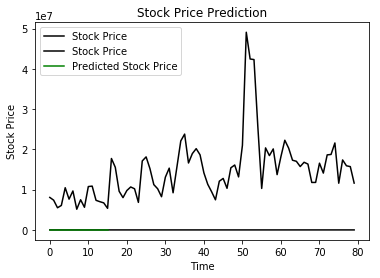

In [50]:
plt.plot(real_stock_price, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

From the plot we can see that the real stock price went up while our model also predicted that the price of the stock will go up. This clearly shows how powerful LSTMs are for analyzing time series and sequential data.

There are a couple of other techniques of predicting stock prices such as moving averages, linear regression, K-Nearest Neighbours, ARIMA and Prophet. These are techniques that one can test on their own and compare their performance with the Keras LSTM.

In [ ]:
# Rolling mean
df['Adj Close: 30 Day Mean'] = df['Adj Close'].rolling(window = 30).mean()
df[['Adj Close', 'Adj Close: 30 Day Mean']].plot(figsize = 16, 16)
plt.show()

In [52]:
# Feature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1085):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [54]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
1025/1025 [==============================] - 11s 11ms/step - loss: 0.0083
Epoch 2/50
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0065
Epoch 3/50
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0065
Epoch 4/50
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0064
Epoch 5/50
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0066
Epoch 6/50
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0066
Epoch 7/50
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0066
Epoch 8/50
1025/1025 [==============================] - 6s 6ms/step - loss: 0.0063
Epoch 9/50
1025/1025 [==============================] - 5s 5ms/step - loss: 0.0064
Epoch 10/50
1025/1025 [==============================] - 6s 5ms/step - loss: 0.0063
Epoch 11/50
1025/1025 [==============================] - 5s 5ms/step - loss: 0.0060
Epoch 12/50
1025/1025 [==============================] - 5s 5ms/step - loss: 0.0062

In [ ]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)
real_stock_price = dataset_test.iloc[:, 1:2].values
# Getting the predicted stock price
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)